<a href="https://colab.research.google.com/github/RafsanJany-44/VitalDB_Research_Initial/blob/main/ecg_delineate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locate P, Q, S and T waves in ECG

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This example shows how to use NeuroKit to delineate the ECG peaks in Python using NeuroKit. This means detecting and locating all components of the QRS complex, including **P-peaks** and **T-peaks**, as well their **onsets** and **offsets** from an ECG signal.

In [1]:
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00


In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd

In [3]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

In this example, we will use a short segment of ECG signal with sampling rate of 3000 Hz.

## Find the R peaks

In [4]:
"""# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)"""

'# Retrieve ECG data from data folder\necg_signal = nk.data(dataset="ecg_1000hz")\n# Extract R-peaks locations\n_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)'

The [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks) function will return a dictionary contains the samples at which R-peaks are located.



---



In [5]:
!pip install pyvital vitaldb vital

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

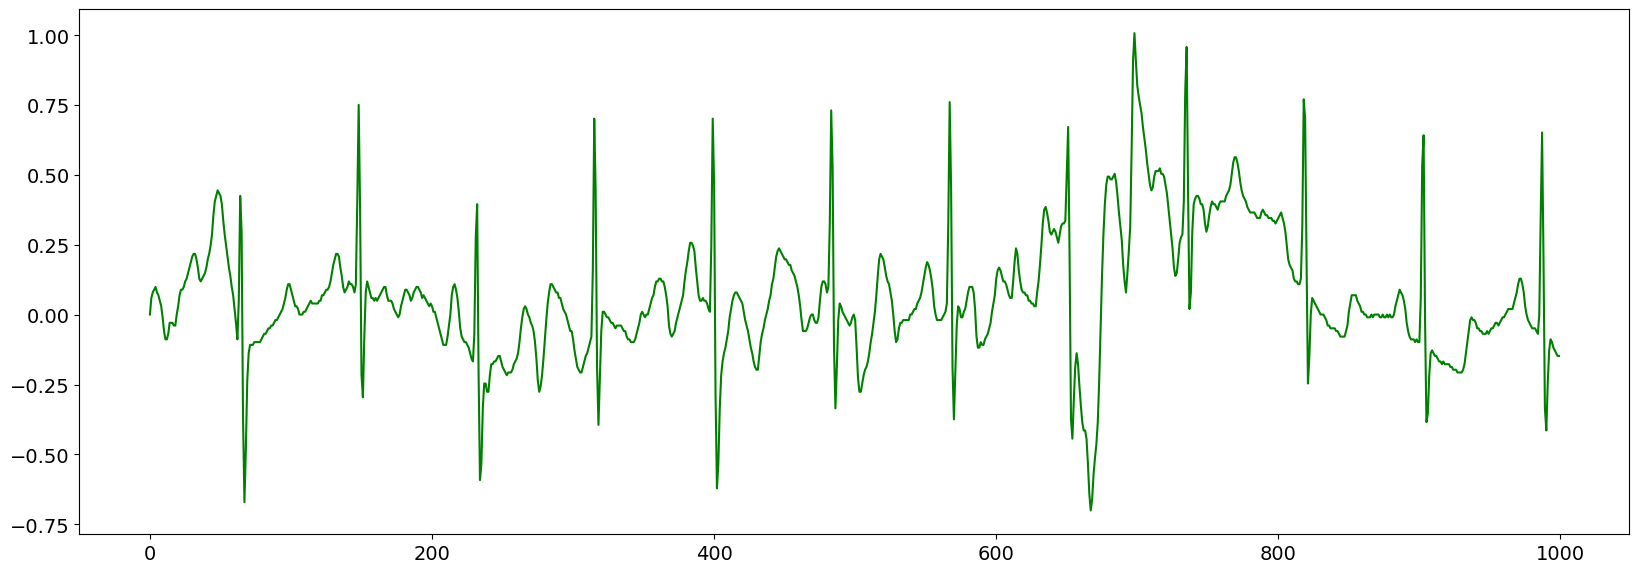

In [33]:
import vitaldb
srate = 100
vals = vitaldb.load_case(10, ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)
signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]
import matplotlib.pyplot as plt
ecg = signal[110000:111000]#vals[110000:111000, 0]
art = vals[110000:111000, 1]

def nrml_plt(ecg):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(ecg, color='g')
"""plt.subplot(212)
plt.plot(art, color='r')
plt.show()"""

nrml_plt(ecg)



---


---




---



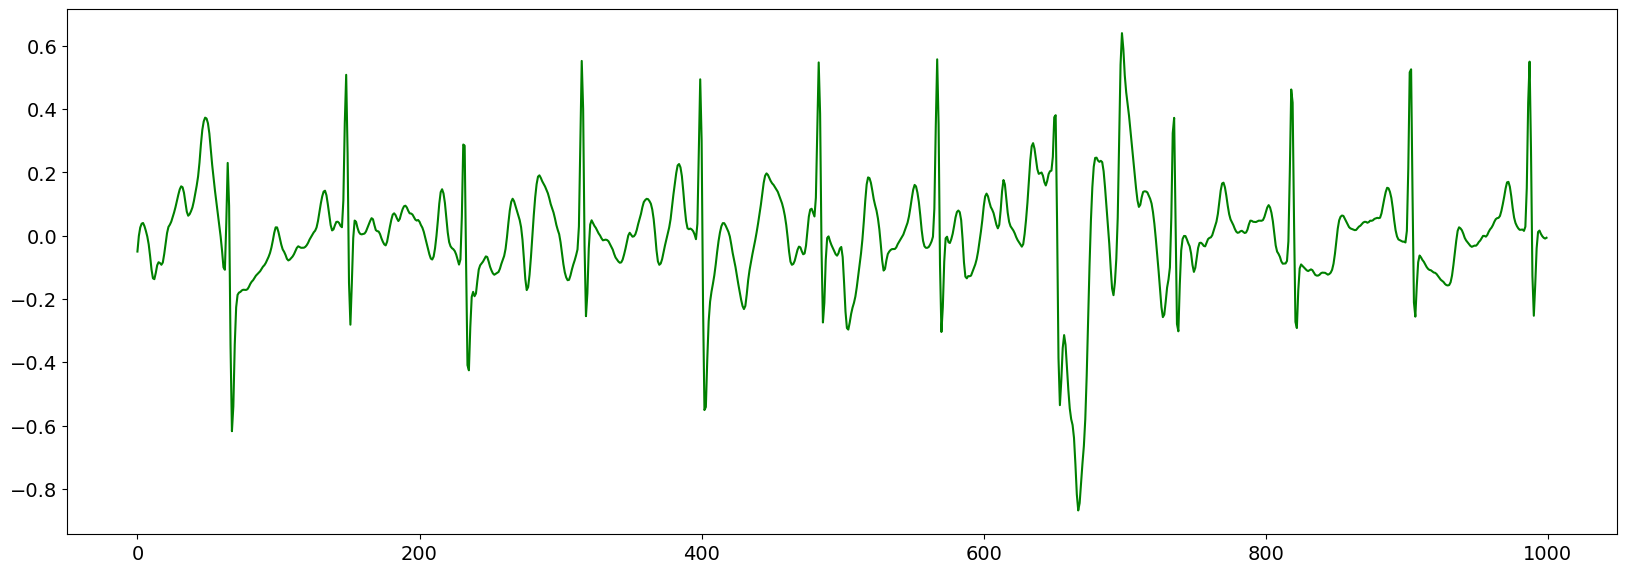

In [35]:
nrml_plt(ecg)

In [34]:
ecg = nk.ecg_clean(ecg, sampling_rate=srate)



---



---



---



In [7]:
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=srate)



---



Let's visualize the R-peaks location in the signal to make sure it got detected correctly.

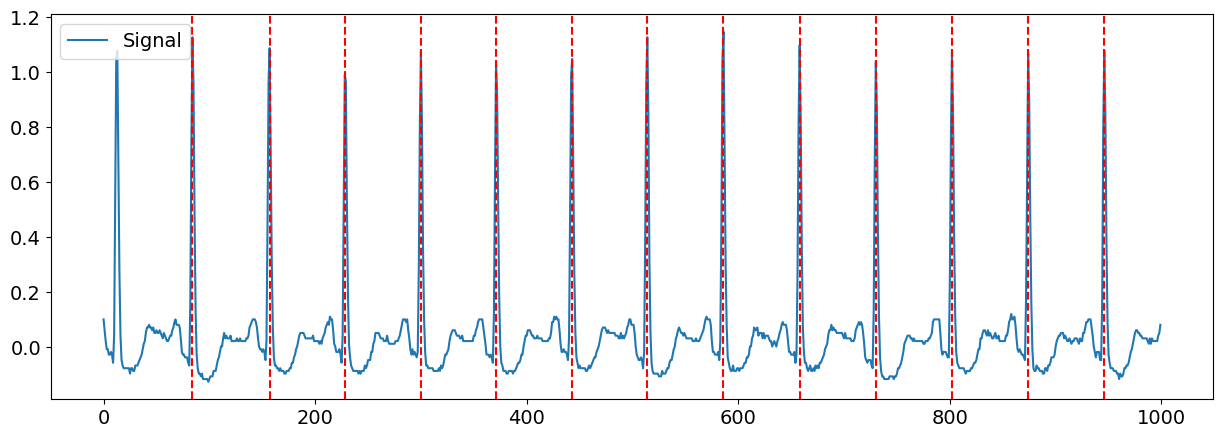

In [8]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg)

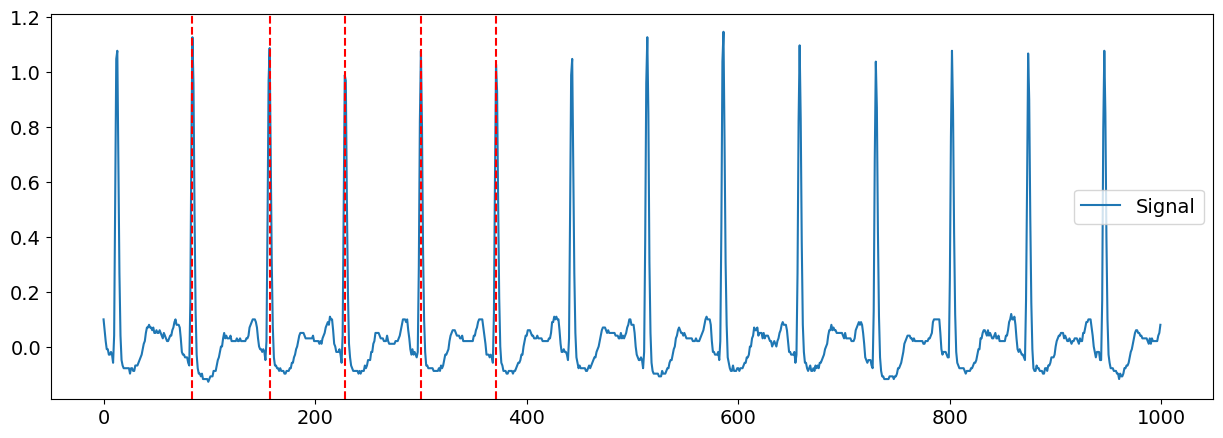

In [9]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg[:6000])

Visually, the R-peaks seem to have been correctly identified. You can also explore searching for R-peaks using different methods provided by NeuroKit [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks).

## Locate other waves (P, Q, S, T) and their onset and offset

In [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate), NeuroKit implements different methods to segment the QRS complexes. There are the derivative method and the other methods that make use of Wavelet to delineate the complexes.

### Peak method

First, let's take a look at the 'peak' method and its output.

In [10]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=srate, method="peak")

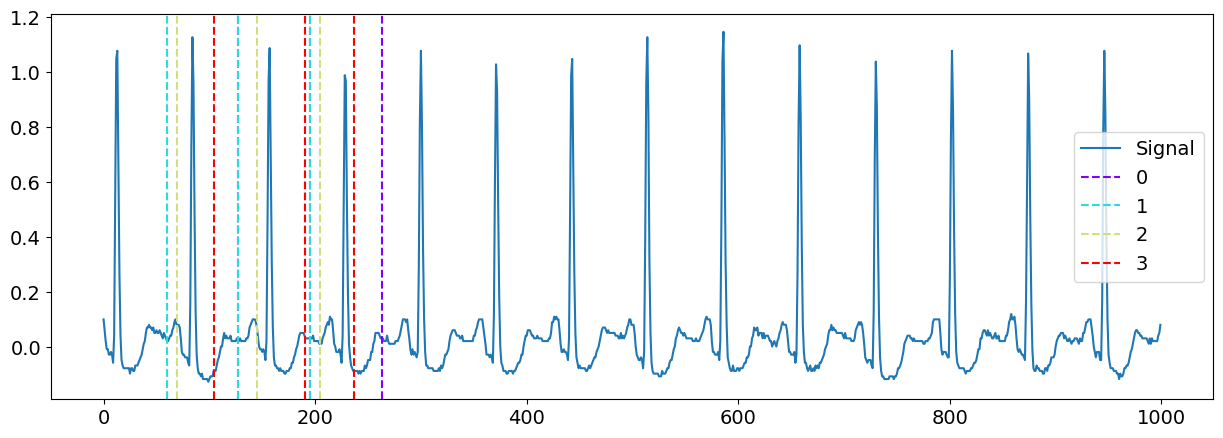

In [11]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg[:4000])


Visually, the 'peak' method seems to have correctly identified the P-peaks, Q-peaks, S-peaks and T-peaks for this signal, at least, for the first few complexes. Well done, *peak*!

However, it can be quite tiring to be zooming in to each complex and inspect them one by one. To have a better overview of all complexes at once, you can make use of the `show` argument in [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate) as below.

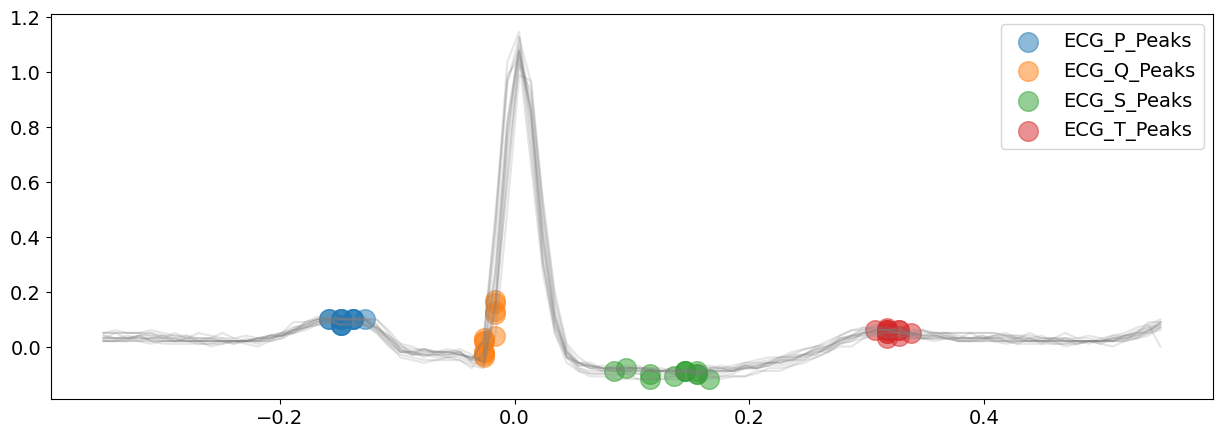

In [12]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg,
                                 rpeaks,
                                 sampling_rate=srate,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

The 'peak' method is doing a glamorous job with identifying all the ECG peaks for this piece of ECG signal.

On top of the above peaks, the peak method also identify the wave boundaries, namely the onset of P-peaks and offset of T-peaks. You can vary the argument `show_type` to specify the information you would like plot.

Let's visualize them below:

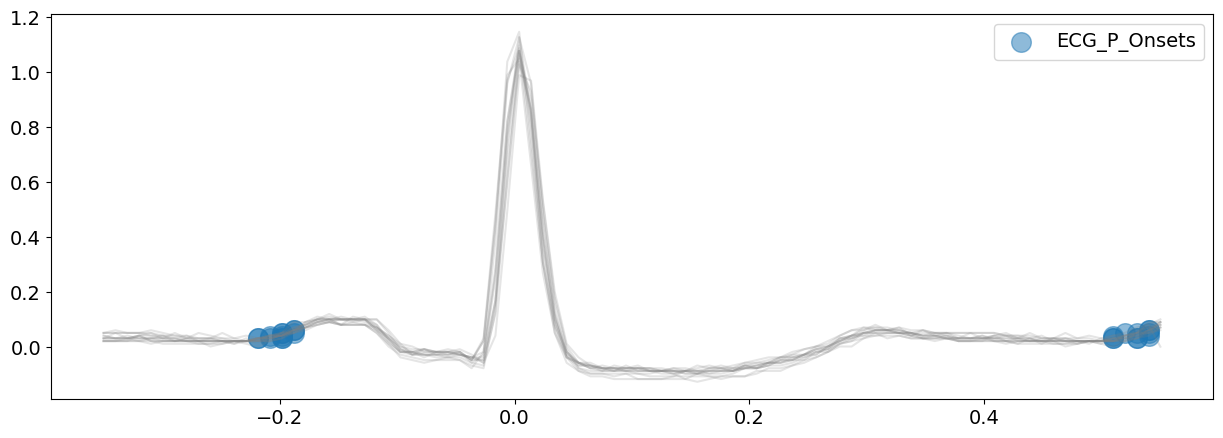

In [13]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg,
                                           rpeaks,
                                           sampling_rate=srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_P')

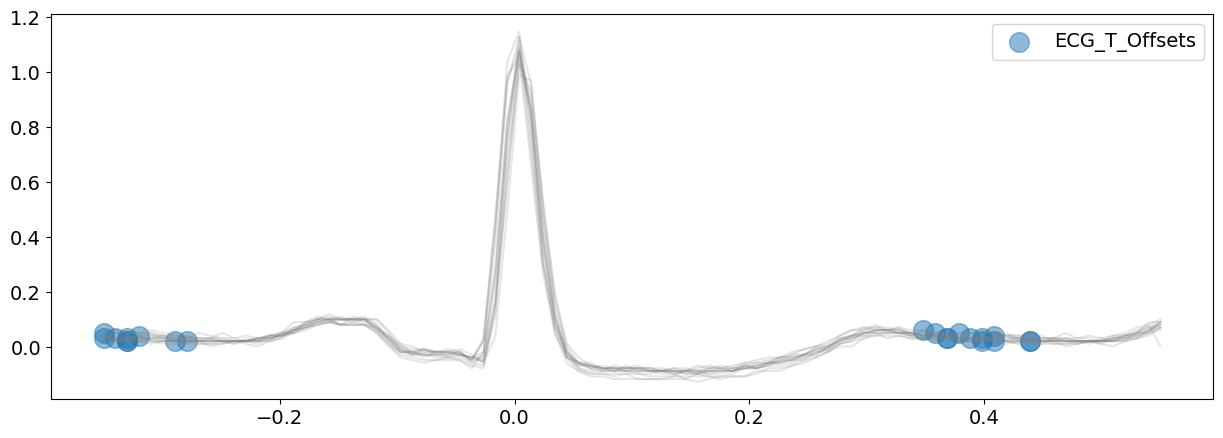

In [14]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg,
                                           rpeaks,
                                           sampling_rate = srate,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_T')

Both the onsets of P-peaks and the offsets of T-peaks appears to have been correctly identified here. This information will be used to delineate cardiac phases in [ecg_phase()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-phase).

Let's next take a look at the continuous wavelet method.

### Continuous Wavelet Method (CWT)

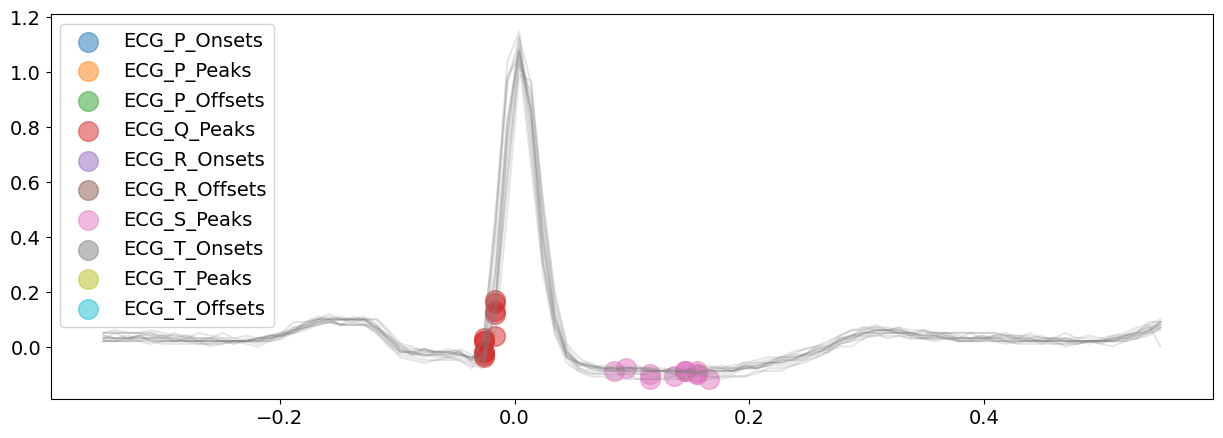

In [15]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='all')

By specifying *'all'* in the `show_type` argument, you can plot all delineated information output by the cwt method. However, it could be hard to evaluate the accuracy of the delineated information with everyhing plotted together. Let's tease them apart!

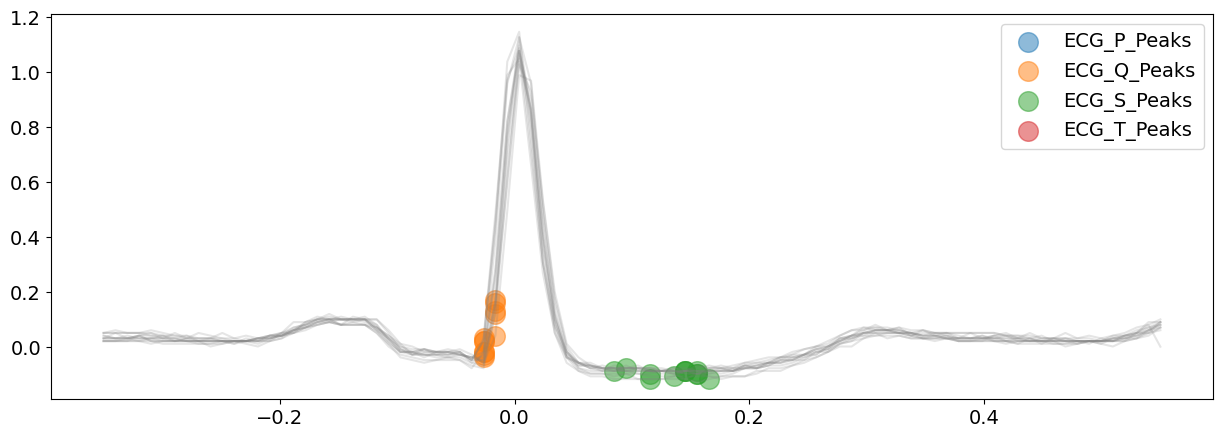

In [16]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='peaks')

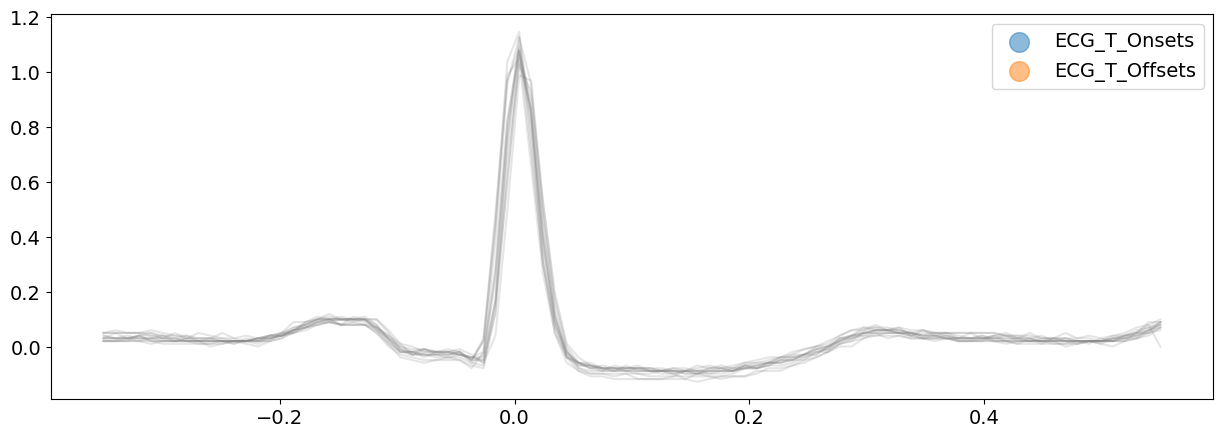

In [17]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_T')

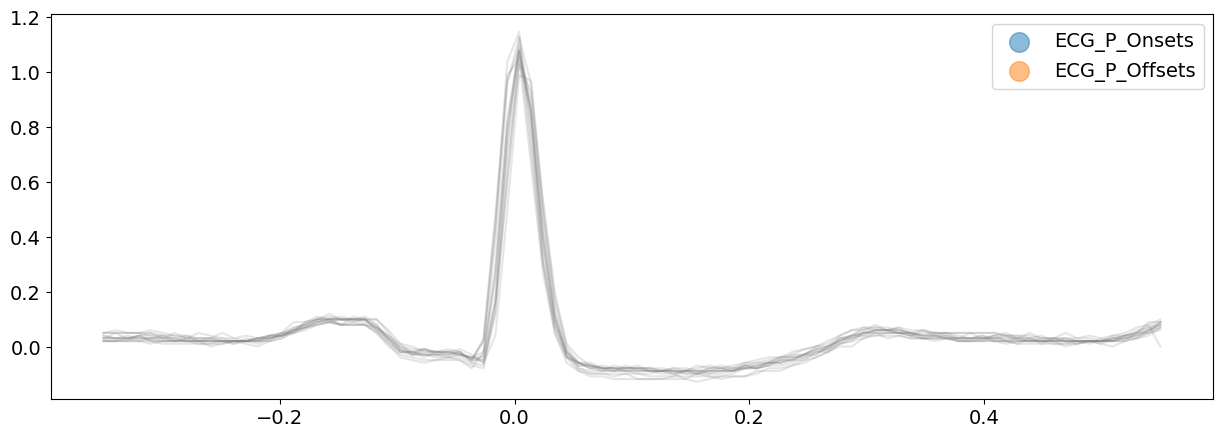

In [18]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_P')

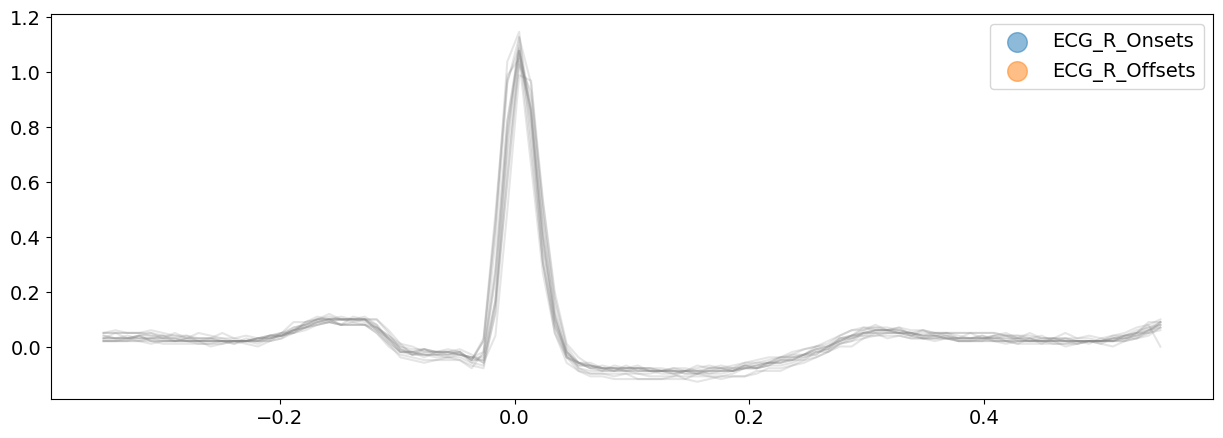

In [19]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_R')

*Unlike the peak method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks. However, it provides more information regarding the boundaries of the waves*

Visually, except a few exception, CWT method is doing a great job. However, the P-waves boundaries are not very clearly identified here.

Last but not least, we will look at the third method in NeuroKit [ecg_delineate()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate) function: the discrete wavelet method.

### Discrete Wavelet Method (DWT) - default method

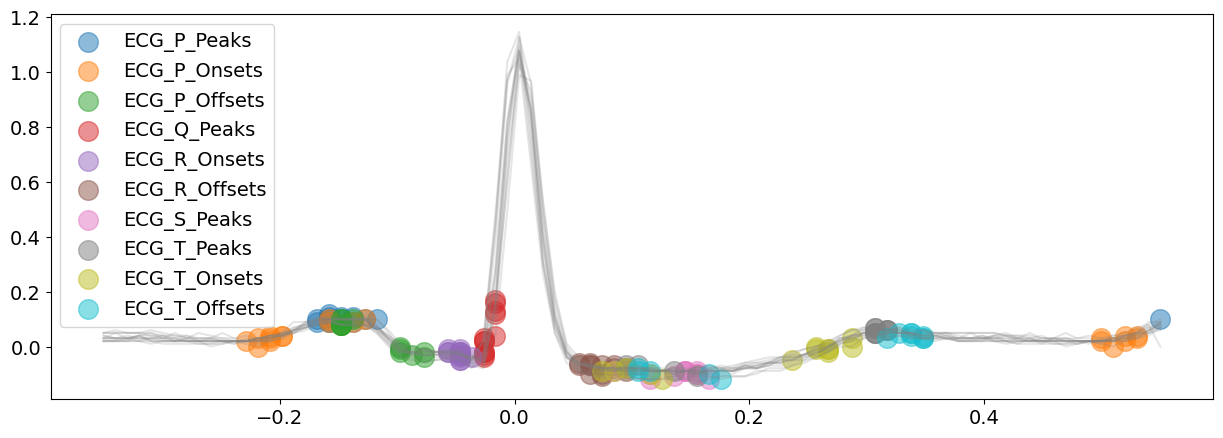

In [20]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='all')

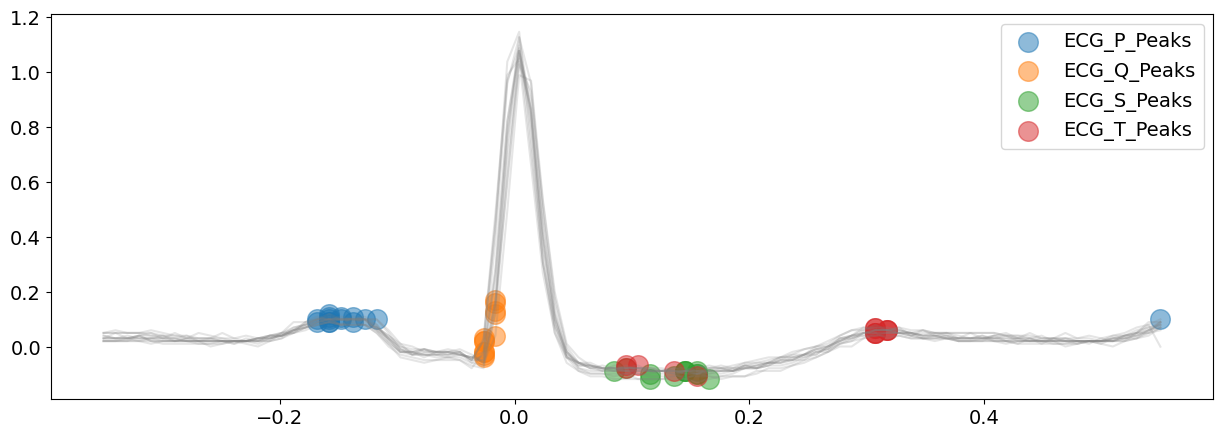

In [21]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='peaks')

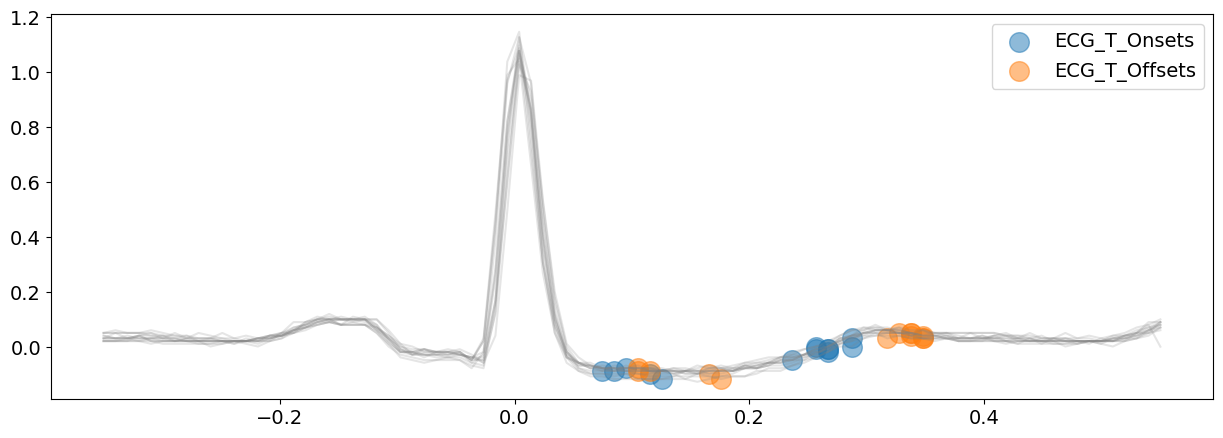

In [22]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_T')

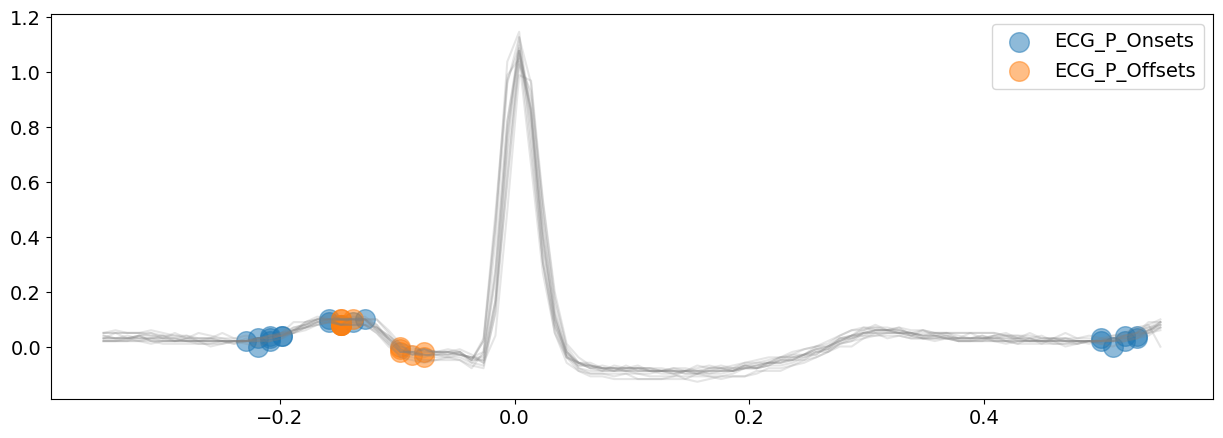

In [23]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_P')

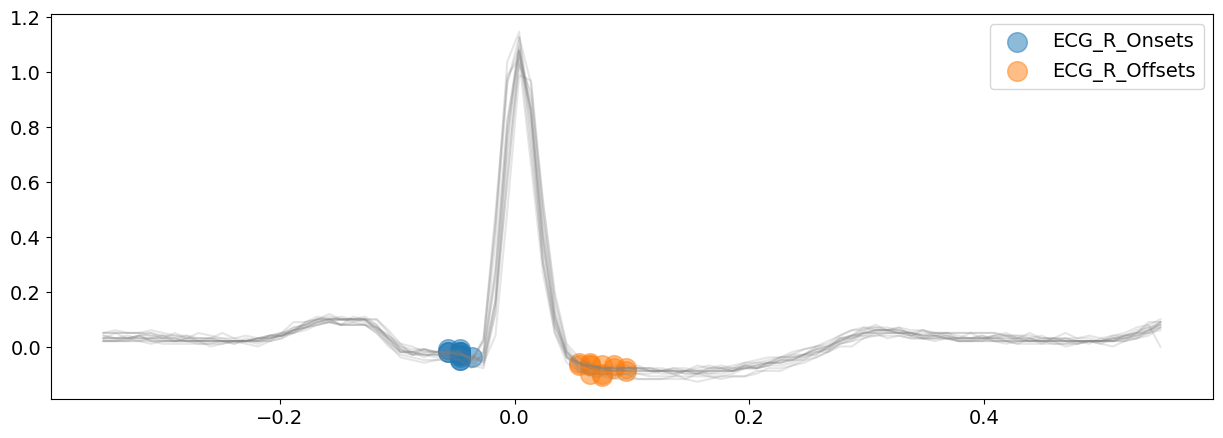

In [24]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg,
                                         rpeaks,
                                         sampling_rate=srate,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_R')

Visually, from the plots above, the delineated outputs of DWT appear to be more accurate than CWT, especially for the P-peaks and P-wave boundaries.

Overall, for this signal, the peak and DWT methods seem to be superior to the CWT.

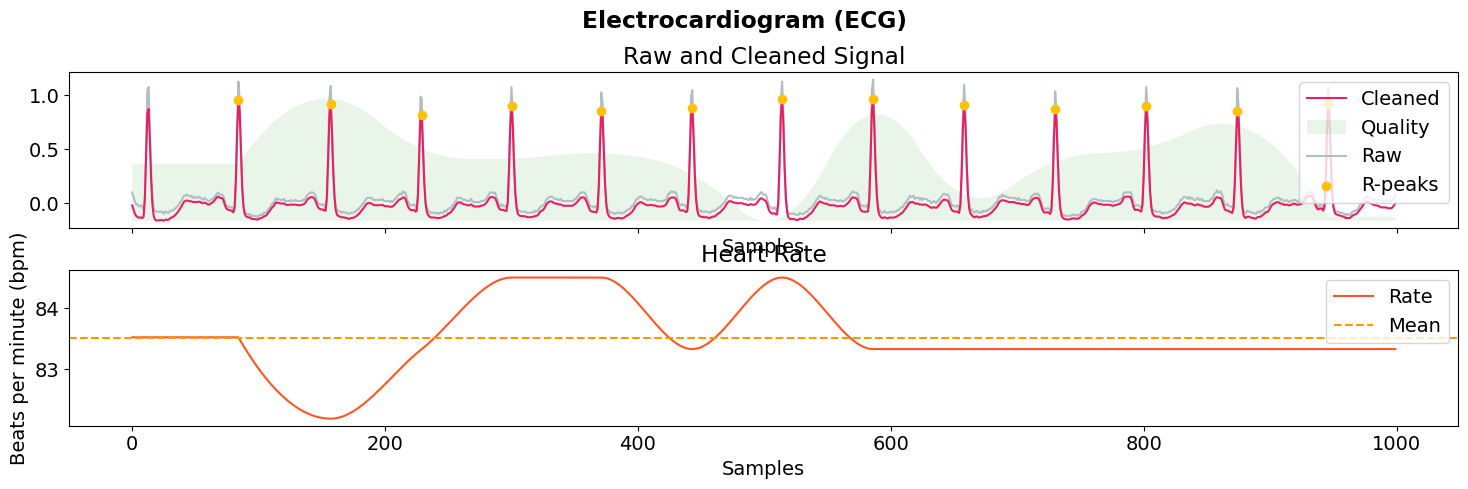

In [25]:
import neurokit2 as nk

# Simulate ECG signal
#ecg = nk.ecg_simulate(duration=15, sampling_rate=500, heart_rate=80)

# Preprocess ECG signal
signals, info = nk.ecg_process(ecg, sampling_rate=srate,method='neurokit')

# Visualize
nk.ecg_plot(signals)

In [26]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.099520,-0.020481,83.526682,0.447695,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.060022,-0.057925,83.526682,0.447695,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.020523,-0.092911,83.526682,0.447695,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.009100,-0.115567,83.526682,0.447695,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.009100,-0.125894,83.526682,0.447695,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.020523,-0.048413,83.333333,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
996,0.020523,-0.045348,83.333333,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
997,0.040273,-0.034921,83.333333,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
998,0.050147,-0.019599,83.333333,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


<Axes: >

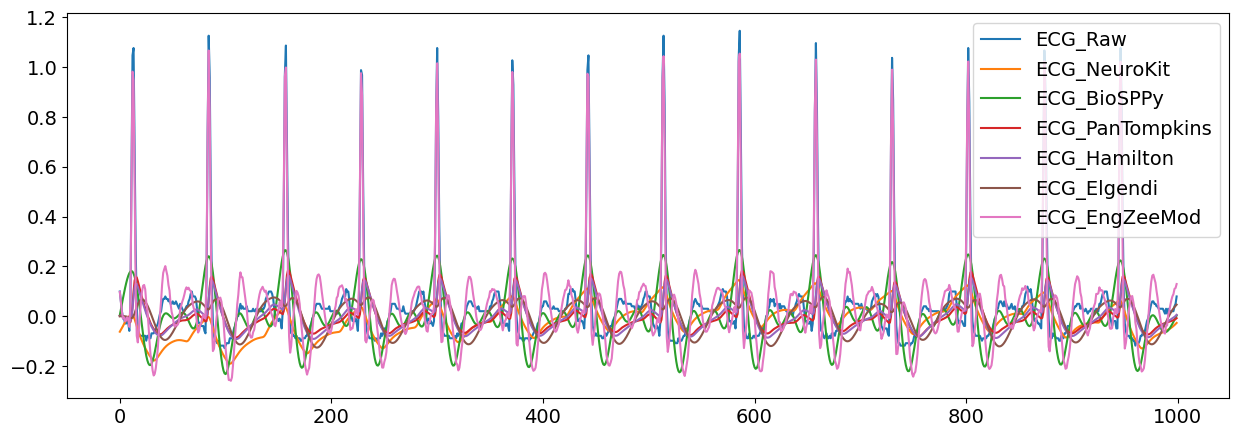

In [27]:
import pandas as pd

import neurokit2 as nk

import matplotlib.pyplot as plt

#ecg = nk.ecg_simulate(duration=10, sampling_rate=1000)

signals = pd.DataFrame({"ECG_Raw" : ecg,
                        "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=1000, method="neurokit"),
                        "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=1000, method="biosppy"),
                        "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=1000, method="pantompkins1985"),
                        "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=1000, method="hamilton2002"),
                        "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=1000, method="elgendi2010"),
                        "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=1000, method="engzeemod2012")})


signals.plot()


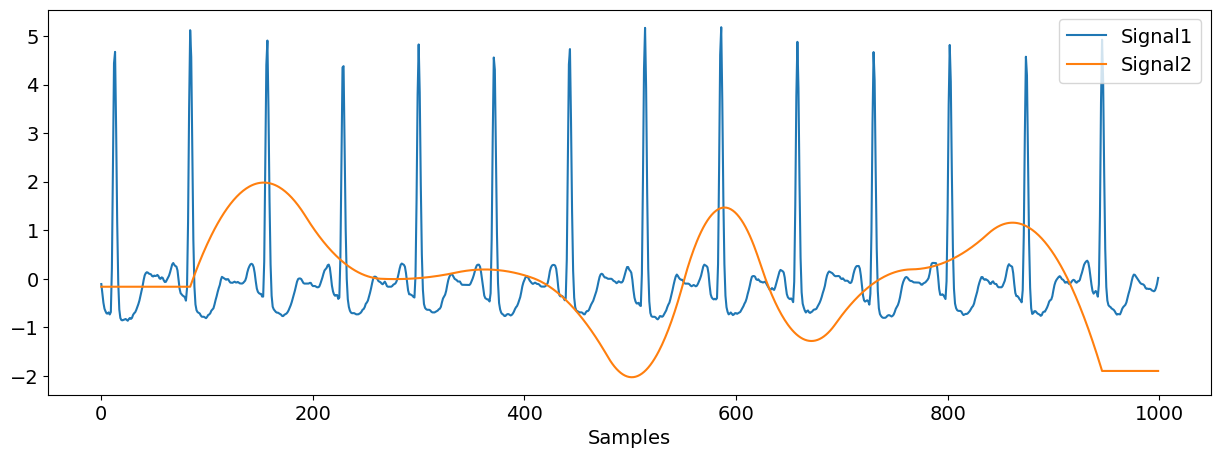

In [28]:
import neurokit2 as nk


ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=100)

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=100)

nk.signal_plot([ecg_cleaned, quality], standardize=True)